###### Assessment

###### I am going to provide two .csv files , you are supposed to work on them and have to provide solutions to the following problems

###### import necessary libraries

In [1]:
import numpy as np 
import pandas as pd
import sklearn as sns
from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import os

###### merge those two csv files (after getting as dataframes, get them as a single dataframe)

In [2]:
file1=pd.read_csv("/content/college_1.csv")
file2=pd.read_csv("/content/college_2.csv")
#file2.info()
merged_file=pd.concat([file1,file2])
merged_file.describe()

,python,mysql,Previous Geekions,CodeKata Score,Rising,python_en,computational_thinking
count,119.000000,119.000000,119.000000,119.000000,119.000000,35.000000,35.000000
mean,54.352941,23.500000,3842.352941,4051.764706,209.411765,29.657143,2.200000
std,44.272526,33.276671,4406.339992,4551.951881,553.445746,30.582524,7.015948
min,-1.000000,-1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000
25%,0.000000,0.000000,740.000000,740.000000,0.000000,0.000000,0.000000
50%,82.000000,4.000000,2410.000000,2410.000000,0.000000,20.000000,0.000000
75%,100.000000,33.000000,5340.000000,5975.000000,0.000000,52.000000,0.000000
max,100.000000,100.000000,24500.000000,24500.000000,3140.000000,100.000000,39.000000


In [3]:
merged_file.columns= merged_file.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
print(merged_file.columns)

Index(['name', 'python', 'mysql', 'previous_geekions', 'codekata_score',
       'department', 'rising', 'python_en', 'computational_thinking'],
      dtype='object')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


###### Take each csv file , split that csv file into multiple categories (example csv files are added in the repo) 


###### consider if the codekata score exceeds 15000 points(present week) then make a csv on those observations as Exceeded expectations.csv


In [4]:
exceeded_exct=merged_file[merged_file['codekata_score']>15000]
exceeded_exct.to_csv("Exceeded_Expectation",index=True)
print(pd.read_csv('Exceeded_Expectation'))

   Unnamed: 0           name  python  ...  rising  python_en  computational_thinking
0           0      A.Dharani    82.0  ...       0        NaN                     NaN
1           1    V.JEEVITHA     82.0  ...       0        NaN                     NaN
2           2    HEMAVATHI.R   100.0  ...       0        NaN                     NaN
3           0  ASHOK KUMAR K   100.0  ...       0        0.0                     9.0

[4 rows x 10 columns]


###### if  10000<codekata score<15000   (Reached_expectations.csv)



In [5]:
reached_exct=merged_file[merged_file['codekata_score']>=10000]
reached_exct=reached_exct[reached_exct["codekata_score"]<15000]

#print(reached_exct)
reached_exct.to_csv("Reached_Expectation",index=False)
print(pd.read_csv('Reached_Expectation').head())

                name  python  mysql  ...  rising  python_en computational_thinking
0        Mugunthan S   100.0   47.0  ...       0        NaN                    NaN
1            Chandru     0.0    0.0  ...     340       20.0                    0.0
2  Ganesh Ramkumar R    -1.0   24.0  ...    2000       55.0                    6.0
3    Bodipudi Harini    -1.0   35.0  ...       0        0.0                   -1.0

[4 rows x 9 columns]


###### if  7000<codekata score<10000   (Needs_Improvement.csv)


In [6]:
needs_imp=merged_file[merged_file['codekata_score']>7000]
needs_imp=needs_imp[needs_imp['codekata_score']<10000]
needs_imp.to_csv("Needs Improvement",index=False)
print(pd.read_csv('Needs Improvement'))

                      name  python  ...  python_en  computational_thinking
0              Sathammai.S   100.0  ...        NaN                     NaN
1             NIVEESHWAR S   100.0  ...        NaN                     NaN
2            KALAIARASAN K    85.0  ...        NaN                     NaN
3     MOHAMED ZUBAIR AHMED    82.0  ...        NaN                     NaN
4                VIINU V P    -1.0  ...      100.0                    -1.0
5               Poojitha Y     0.0  ...       78.0                     0.0
6   Gowtham Chandrasekaran    -1.0  ...        0.0                     3.0
7                Gowtham R    -1.0  ...       60.0                     6.0
8                 shifak N    58.0  ...        0.0                     0.0
9                  Balaji     -1.0  ...      100.0                     0.0
10                Rushitha    -1.0  ...       15.0                     9.0
11    Balaraman Muthupandi    -1.0  ...        9.0                     0.0
12                JPradha

###### if  codekate score < 7000        (Unsatisfactory.csv)

In [7]:
unsatis=merged_file[merged_file['codekata_score']<7000]
unsatis.to_csv("Unsatisfactory",index=False)
print(pd.read_csv('Unsatisfactory'))

               name  python  mysql  ...  rising  python_en computational_thinking
0        J.SUGANTHI    27.0  50.00  ...       0        NaN                    NaN
1      thamizhpaana    29.0   0.00  ...       0        NaN                    NaN
2   Iyappan Samiraj    50.0  24.00  ...       0        NaN                    NaN
3      Ponniyamma.R   100.0  11.25  ...       0        NaN                    NaN
4         SABAPATHI   100.0   0.00  ...       0        NaN                    NaN
..              ...     ...    ...  ...     ...        ...                    ...
88    praveen raj j    24.0   0.00  ...       0       -1.0                    0.0
89       AMARNATH D    -1.0  12.00  ...       0       52.0                   -1.0
90             bala    32.0   0.00  ...       0       49.0                   -1.0
91             XY Z    -1.0  -1.00  ...       0       20.0                   -1.0
92        Hariharan    -1.0  -1.00  ...       0       -1.0                    0.0

[93 rows x 9 co

###### Average of previous week geekions vs this week geekions (i.e Previous Geekions vs CodeKata Score)

In [8]:
p=merged_file['previous_geekions'].mean()
l=merged_file['codekata_score'].mean()
print(p,l)

3842.3529411764707 4051.764705882353


###### No of students participated 

In [9]:
merged_file[["name"]].count()

name    119
dtype: int64

###### #Average completion of python course or my_sql or python english or computational thinking

In [10]:
merged_file[['python','python_en','mysql','computational_thinking']].mean()

python                    54.352941
python_en                 29.657143
mysql                     23.500000
computational_thinking     2.200000
dtype: float64

###### rising star of the week (top 3 candidate who performed well in that particular week)

In [11]:
mf=merged_file
mf.nlargest(5,["codekata_score"])

,name,python,mysql,previous_geekions,codekata_score,department,rising,python_en,computational_thinking
0,A.Dharani,82.0,20.0,24500,24500,Computer Science and Engineering,0,NaN,NaN
1,V.JEEVITHA,82.0,20.0,21740,21740,Computer Science and Engineering,0,NaN,NaN
2,HEMAVATHI.R,100.0,100.0,19680,19680,Computer Science and Engineering,0,NaN,NaN
0,ASHOK KUMAR K,100.0,31.0,19400,19400,Electronics and Electrical Engineering,0,0.0,9.0
1,Chandru,0.0,0.0,14150,14490,Computer Science and Engineering,340,20.0,0.0


###### Shining stars of the week (top 3 candidates who has highest geekions)

In [12]:
mf.nlargest(3,["previous_geekions"])  

,name,python,mysql,previous_geekions,codekata_score,department,rising,python_en,computational_thinking
0,A.Dharani,82.0,20.0,24500,24500,Computer Science and Engineering,0,NaN,NaN
1,V.JEEVITHA,82.0,20.0,21740,21740,Computer Science and Engineering,0,NaN,NaN
2,HEMAVATHI.R,100.0,100.0,19680,19680,Computer Science and Engineering,0,NaN,NaN


###### Department wise codekata performence (pie chart)

In [13]:
#from sklearn.preprocessing import LabelEncoder
#encoder=LabelEncoder()
#mf["department"]=encoder.fit_transform(mf["department"].astype('str'))
#print(mf["department"].unique())

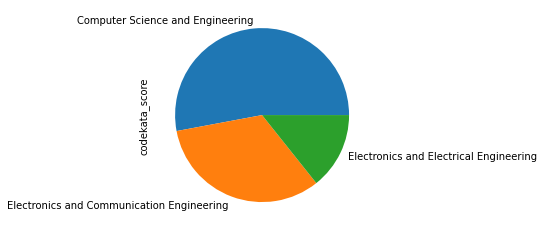

In [14]:
mf.groupby("department")["codekata_score"].count().plot(kind="pie")

###### Department wise toppers (horizantal bar graph or any visual representations of your choice)

In [15]:
dept = mf.sort_values(by = 'department')
op = dept['department'].unique()
print(op)
dept_name = (dept.groupby('department').apply(lambda x: x[x['codekata_score'] == x['codekata_score'].max()]))
op_dept_name = dept_name["name"]
print(op_dept_name)

['Computer Science and Engineering'
 'Electronics and Communication Engineering'
 'Electronics and Electrical Engineering']
department                                  
Computer Science and Engineering           0          A.Dharani
Electronics and Communication Engineering  3    Bodipudi Harini
Electronics and Electrical Engineering     0      ASHOK KUMAR K
Name: name, dtype: object
